In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Load the data and view first few rows and info

In [6]:
df = pd.read_csv('diabetes.csv')
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


# Information about dataset

In [50]:
df.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


There are no null values and they are all float or int so the data is clean and we can use it.

# Attribute information:

* AGE: age in years
* SEX
* BMI: body mass index
* BP: average blood pressure
* S1: tc, total serum cholesterol
* S2: ldl, low-density lipoproteins
* S3: hdl, high-density lipoproteins
* S4: tch, total cholesterol / HDL
* S5: ltg, possibly log of serum triglycerides level
* S6: glu, blood sugar level
* Y: measure of disease progression one year after baseline

In [3]:
# View entries where Y is greater than mean (high disease progression)
highY = df[df['Y'] >= df['Y'].mean()]
highY

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
3,24,1,25.3,84.0,198,131.4,40.0,5.00,4.8903,89,206
9,29,1,30.0,85.0,180,93.4,43.0,4.00,5.3845,88,310
12,53,1,23.7,92.0,186,109.2,62.0,3.00,4.3041,81,179
13,50,2,26.2,97.0,186,105.4,49.0,4.00,5.0626,88,185
15,34,2,24.7,118.0,254,184.2,39.0,7.00,5.0370,81,171
...,...,...,...,...,...,...,...,...,...,...,...
428,62,2,34.6,120.0,215,129.2,43.0,5.00,5.3660,123,310
430,46,1,21.1,80.0,205,144.4,42.0,5.00,4.5326,87,183
432,51,1,31.5,93.0,231,144.0,49.0,4.70,5.2523,117,173
437,60,2,28.2,112.0,185,113.8,42.0,4.00,4.9836,93,178


In [4]:
# View entries where Y is less than mean (low disease progression)
lowY = df[df['Y'] < df['Y'].mean()]
lowY

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
5,23,1,22.6,89.00,139,64.8,61.0,2.00,4.1897,68,97
...,...,...,...,...,...,...,...,...,...,...,...
435,45,1,24.2,83.00,177,118.4,45.0,4.00,4.2195,82,64
436,33,1,19.5,80.00,171,85.4,75.0,2.00,3.9703,80,48
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132


# Visualize correlation between attributes

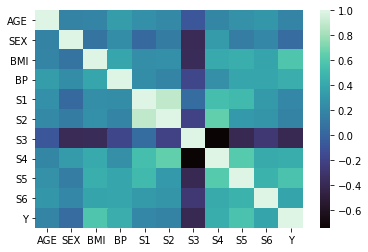

In [7]:
correlation = df.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, cmap="mako")
plt.show()

Lighter colors indicate greater correlation.

For Y, the attributes with lighter colors are BMI and S5. This means that these attributes may have a greater correlation with Y.

I also want to look at S6 (blood sugar level) which would appeal to common sense that this would relate to diabetes progression.

# BMI vs. Y (Disease progression)

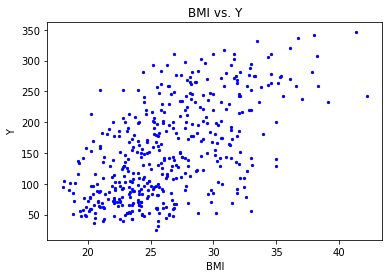

In [8]:
bmi = df[['BMI','Y']]
bmi.plot(kind='scatter', x='BMI', y='Y', s=5, color='blue', title='BMI vs. Y')  #scatter plot
plt.show()

# S5 vs. Y (Disease progression)

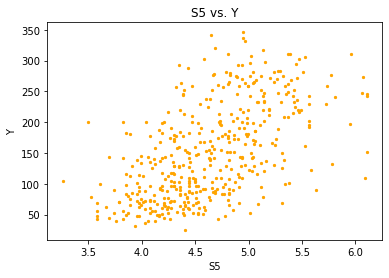

In [9]:
s5 = df[['S5','Y']]
s5.plot(kind='scatter', x='S5', y='Y', s=5, color='orange', title='S5 vs. Y')
plt.show()

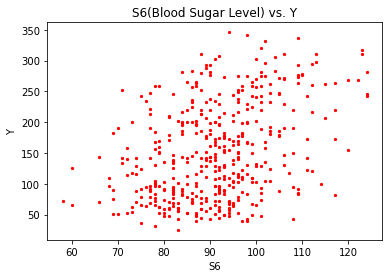

In [10]:
s6 = df[['S6','Y']]
s6.plot(kind='scatter', x='S6', y='Y', s=5, color='red', title='S6(Blood Sugar Level) vs. Y')
plt.show()

# Visualize relationships with linear regression

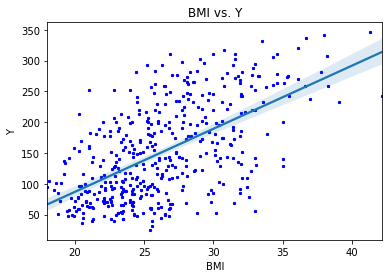

In [11]:
bmi = df[['BMI','Y']]
bmi.plot(kind='scatter', x='BMI', y='Y', s=5, color='blue', title='BMI vs. Y')  #scatter plot
sns.regplot(x=df['BMI'], y=df['Y'], scatter_kws={"color": "blue", 's':4})  #linear regression line with seaborn
plt.show()

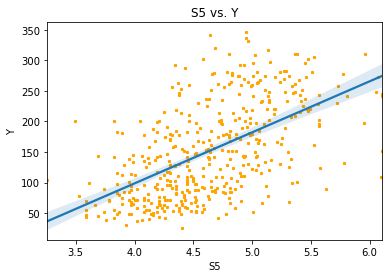

In [12]:
s5 = df[['S5','Y']]
s5.plot(kind='scatter', x='S5', y='Y', s=5, color='orange', title='S5 vs. Y')
sns.regplot(x=df['S5'], y=df['Y'], scatter_kws={"color": "orange", 's':4})
plt.show()

We can see a linear relationships for the attributes BMI and S5, with respect to Y (disease progression). This is just a visual representation to see patterns and doesn't give a quantitative view that will require further statistical analysis.

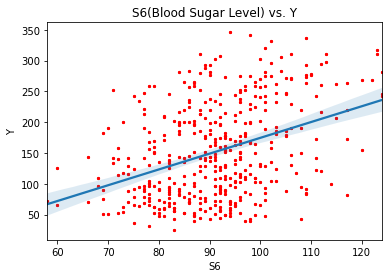

In [11]:
s6 = df[['S6','Y']]
s6.plot(kind='scatter', x='S6', y='Y', s=5, color='red', title='S6(Blood Sugar Level) vs. Y')
sns.regplot(x=df['S6'], y=df['Y'], scatter_kws={"color": "red", 's':4})
plt.show()

We can see a small linear relationship for attributes S6 with respect to Y. The points are more widespread than the previous attributes, which might mean S6 has a smaller correlation with Y, disease progression.